<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
import yfinance as yf

# Создаем объект тикера для акций Tesla
tesla_ticker = yf.Ticker("TSLA")

# Теперь у вас есть объект `tesla_ticker`, который можно использовать для извлечения данных

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
import yfinance as yf

# Создаем объект тикера для Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Извлекаем исторические данные за весь доступный период
tesla_data = tesla.history(period="max")

# Проверяем результат
print(f"Данные загружены. Размер DataFrame: {tesla_data.shape}")
print(tesla_data.head())

Данные загружены. Размер DataFrame: (3777, 7)
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
# Сброс индекса и преобразование даты в обычный столбец
tesla_data.reset_index(inplace=True)

# Вывод первых пяти строк
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
import requests

# URL веб-страницы с данными о выручке Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Отправка GET-запроса к странице
response = requests.get(url)

# Проверка успешности запроса (статус 200)
if response.status_code == 200:
    # Сохранение HTML-содержимого в переменную
    html_data = response.text
    print("Данные успешно загружены!")
    print(f"Первые 500 символов:\n{html_data[:500]}...")
else:
    print(f"Ошибка загрузки! Статус код: {response.status_code}")
    html_data = None  # Сохраняем None в случае ошибки

Данные успешно загружены!
Первые 500 символов:

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	...


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [12]:
from bs4 import BeautifulSoup

# Используем html.parser для анализа HTML-содержимого
soup = BeautifulSoup(html_data, 'html.parser')

# Альтернативно можно использовать html5lib (требует установки)
# soup = BeautifulSoup(html_data, 'html5lib')

# Проверяем результат
print(f"Тип объекта: {type(soup)}")
print(f"Заголовок страницы: {soup.title.text}")

Тип объекта: <class 'bs4.BeautifulSoup'>
Заголовок страницы: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [14]:
from bs4 import BeautifulSoup
import pandas as pd

# Создаем объект BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Находим таблицу по классу (как указано в HTML)
table = soup.find('table', {'class': 'table'})

# Создаем пустой список для данных
data = []

# Извлекаем строки таблицы (пропускаем заголовок)
rows = table.find_all('tr')[1:]  # [1:] пропускаем строку заголовков

# Проходим по каждой строке таблицы
for row in rows:
    # Извлекаем все ячейки в строке
    cols = row.find_all('td')
    
    # Проверяем что в строке ровно 2 колонки (Date и Revenue)
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        # Добавляем данные в список
        data.append([date, revenue])

# Создаем DataFrame из извлеченных данных
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Показываем первые 5 строк
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [16]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [18]:
# Отображение последних 5 строк DataFrame
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [19]:
import yfinance as yf

# Создаем объект тикера для GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Проверяем информацию о компании
print(f"Компания: {gme_ticker.info['longName']}")
print(f"Символ: {gme_ticker.info['symbol']}")
print(f"Рыночная капитализация: {gme_ticker.info['marketCap']} USD")
print(f"Текущая цена: {gme_ticker.info['currentPrice']} USD")

# Пример извлечения исторических данных
gme_history = gme_ticker.history(period="1mo")
print("\nИсторические данные за последний месяц:")
print(gme_history.tail())

Компания: GameStop Corp.
Символ: GME
Рыночная капитализация: 10552655872 USD
Текущая цена: 23.59 USD

Исторические данные за последний месяц:
                                Open   High        Low      Close    Volume  \
Date                                                                          
2025-06-27 00:00:00-04:00  23.990000  24.26  23.459999  23.590000  11638200   
2025-06-30 00:00:00-04:00  23.639999  24.40  23.540001  24.389999  10439300   
2025-07-01 00:00:00-04:00  24.150000  24.50  23.680000  23.680000   8308000   
2025-07-02 00:00:00-04:00  23.900000  24.10  23.750000  23.950001   6428600   
2025-07-03 00:00:00-04:00  23.850000  24.16  23.490000  23.590000   5566300   

                           Dividends  Stock Splits  
Date                                                
2025-06-27 00:00:00-04:00        0.0           0.0  
2025-06-30 00:00:00-04:00        0.0           0.0  
2025-07-01 00:00:00-04:00        0.0           0.0  
2025-07-02 00:00:00-04:00        0.0   

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [20]:
import yfinance as yf

# Создаем объект тикера для GameStop (GME)
gme = yf.Ticker("GME")

# Извлекаем исторические данные за весь доступный период
gme_data = gme.history(period="max")

# Проверяем результат
print(f"Данные загружены. Размер DataFrame: {gme_data.shape}")
print(f"Первая дата: {gme_data.index[0]}")
print(f"Последняя дата: {gme_data.index[-1]}")
print("\nПервые 5 строк данных:")
print(gme_data.head())

Данные загружены. Размер DataFrame: (5885, 7)
Первая дата: 2002-02-13 00:00:00-05:00
Последняя дата: 2025-07-03 00:00:00-04:00

Первые 5 строк данных:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00     

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:

import yfinance as yf
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [23]:
import requests

# URL веб-страницы с данными о выручке GameStop
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Отправка GET-запроса к странице
response = requests.get(url)

# Проверка успешности запроса
if response.status_code == 200:
    # Сохранение HTML-содержимого в переменную
    html_data_2 = response.text
    print("Данные успешно загружены!")
    print(f"Размер данных: {len(html_data_2)} символов")
    print(f"Первые 300 символов:\n{html_data_2[:300]}...")
else:
    print(f"Ошибка загрузки! Статус код: {response.status_code}")
    html_data_2 = None  # Сохраняем None в случае ошибки

Данные успешно загружены!
Размер данных: 88703 символов
Первые 300 символов:
<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets...


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [24]:
# Извлечение данных из таблицы
data = []
for row in table.find_all('tr')[1:]:  # Пропускаем заголовок
    cols = row.find_all('td')
    if len(cols) == 2:  # Проверяем наличие двух столбцов
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Создание DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Просмотр первых строк
print(gme_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
from bs4 import BeautifulSoup
import pandas as pd

# Создаем объект BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Находим таблицу по классу
table = soup.find('table', {'class': 'table'})

# Создаем пустой список для данных
data = []

# Извлекаем строки таблицы (пропускаем заголовок)
rows = table.find_all('tr')[1:]  # [1:] пропускаем строку заголовков

# Проходим по каждой строке таблицы
for row in rows:
    # Извлекаем все ячейки в строке
    cols = row.find_all('td')
    
    # Проверяем что в строке ровно 2 колонки (Date и Revenue)
    if len(cols) == 2:
        date = cols[0].text.strip()
        
        # Очищаем значение Revenue: удаляем $ и запятые
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        
        # Добавляем данные в список
        data.append([date, revenue])

# Создаем DataFrame из извлеченных данных
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Показываем первые 5 строк
print(gme_revenue.head())

   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 1. Загрузка HTML-данных
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# 2. Парсинг с помощью BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')
table = soup.find('table', class_='table')

# 3. Извлечение и очистка данных
data = []
for row in table.find_all('tr')[1:]:  # Пропуск заголовка
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        data.append([date, revenue])

# 4. Создание DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# 5. Отображение последних 5 строк
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


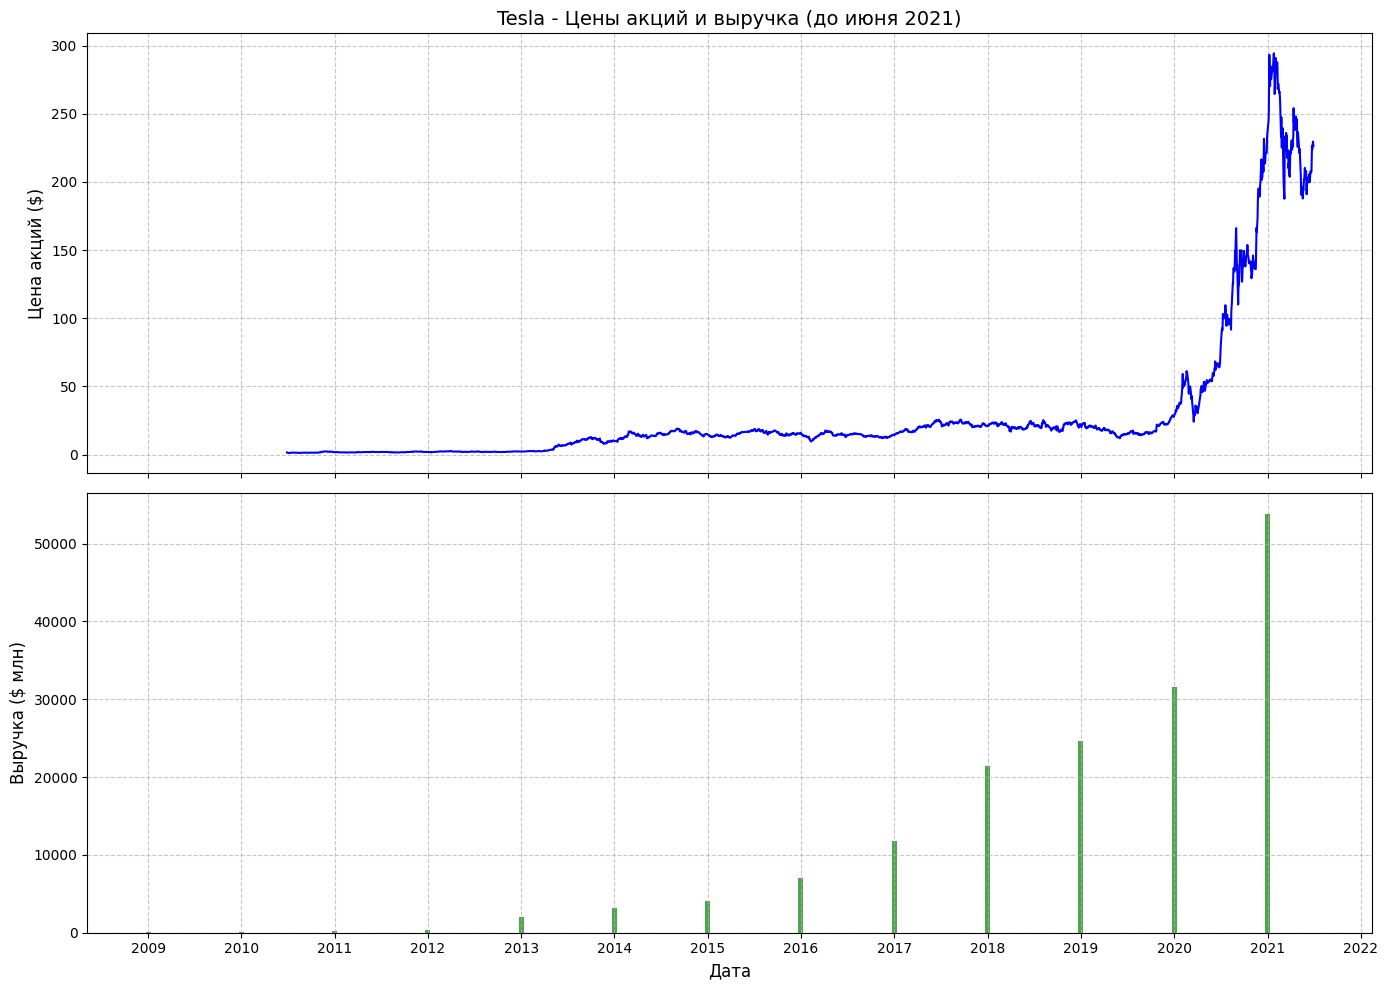

In [31]:
def make_graph(stock_data, revenue_data, title):
    """
    Функция для построения графика цен акций и выручки компании
    """
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import pandas as pd
    
    # Удаляем информацию о часовом поясе из дат
    stock_data['Date'] = stock_data['Date'].dt.tz_localize(None)
    revenue_data['Date'] = revenue_data['Date'].dt.tz_localize(None)
    
    # Фильтрация данных до июня 2021 года
    cutoff_date = pd.Timestamp('2021-06-30')
    stock_data = stock_data[stock_data['Date'] <= cutoff_date]
    revenue_data = revenue_data[revenue_data['Date'] <= cutoff_date]
    
    # Создание фигуры с двумя субплогами
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # График цен акций
    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-', linewidth=1.5)
    ax1.set_ylabel('Цена акций ($)', fontsize=12)
    ax1.set_title(f'{title} - Цены акций и выручка (до июня 2021)', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # График выручки
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='green', alpha=0.7, width=20)
    ax2.set_ylabel('Выручка ($ млн)', fontsize=12)
    ax2.set_xlabel('Дата', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Форматирование дат
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.tight_layout()
    plt.show()

# Предварительная обработка данных
tesla_data['Date'] = pd.to_datetime(tesla_data['Date']).dt.tz_localize(None)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date']).dt.tz_localize(None)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

# Вызов функции для Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


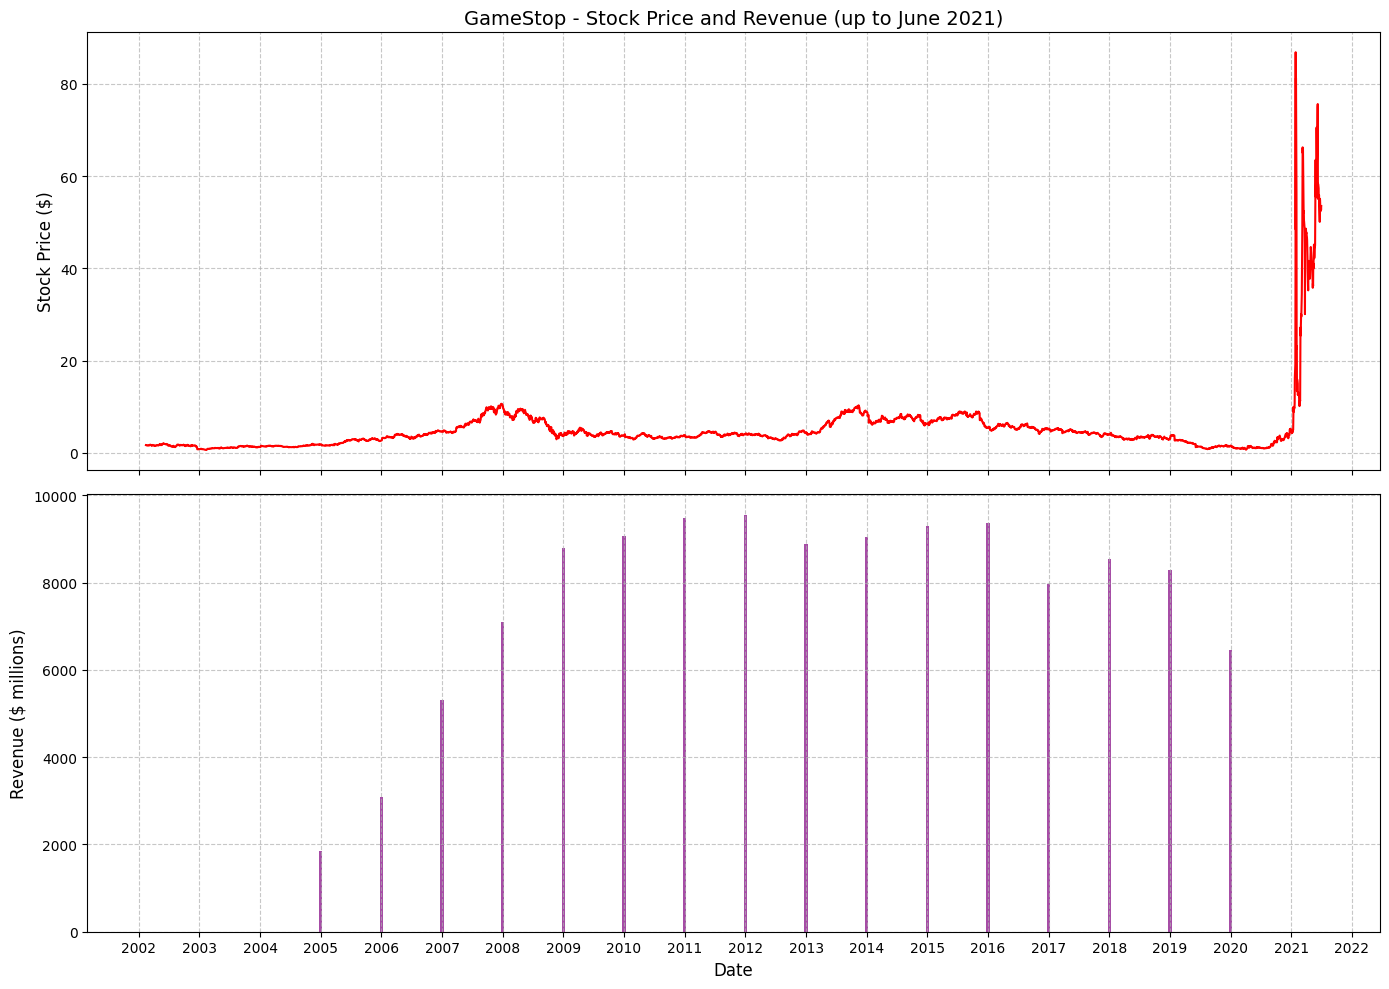

In [32]:
# Определение функции make_graph (если еще не определена)
def make_graph(stock_data, revenue_data, title):
    """
    Функция для построения графика цен акций и выручки компании
    """
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import pandas as pd
    
    # Убедимся, что даты в правильном формате и без часового пояса
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.tz_localize(None)
    
    # Фильтрация данных до июня 2021 года
    cutoff_date = pd.Timestamp('2021-06-30')
    stock_data = stock_data[stock_data['Date'] <= cutoff_date]
    revenue_data = revenue_data[revenue_data['Date'] <= cutoff_date]
    
    # Создание фигуры с двумя субплогами
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # График цен акций
    ax1.plot(stock_data['Date'], stock_data['Close'], 'r-', linewidth=1.5)  # Красный цвет для GME
    ax1.set_ylabel('Stock Price ($)', fontsize=12)
    ax1.set_title(f'{title} - Stock Price and Revenue (up to June 2021)', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # График выручки
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='purple', alpha=0.7, width=20)  # Фиолетовый для GME
    ax2.set_ylabel('Revenue ($ millions)', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Форматирование дат
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.tight_layout()
    plt.show()

# Предварительная обработка данных для GameStop
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Вызов функции для GameStop
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
